In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# Loading the dataset

In [2]:
df_regions = pd.read_csv('df_regions.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df_regions.head()

,region,sum_injuries,male_injuries,female_injuries,urban_injuries,suburban_injuries,injuries_0_18,injuries_18_30,injuries_30_40,injuries_40_50,injuries_50,injuries_saudi,injuries_foreign,sum_dead,male_dead,female_dead,urban_dead,suburban_dead,dead_0_18,dead_18_30,dead_30_40,dead_40_50,dead_50,dead_saudi,dead_foreign,sum_accidents,sum_involved,acc_damages,acc_injuries,acc_dead,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,day,night,urban,suburban,small_car,jeep,bus,pickup,truck,water_truck,other,involved_0_18,involved_18_30,involved_30_40,involved_40_50,involved_50,involved_saudi,involved_foreign,involved_married,involved_single,involved_litrate,involved_illitrate,private_license,public_license,machine_license,bike_license,no_license,sum_license,valid_license,expired_license,type_car_hit,type_object_hit,type_pedestrain_hit,type_animal_hit,type_Fire,type_rollover,type_offroad_diviation,type_other,cause_illegal_parking_stop,cause_illegal_turn,cause_illegal_crossing,cause_traffic_light_break,cause_speeding,cause_drug_use,cause_other,injuries_total,dead_total,intact_total
0,Al-Baha,935.0,816.0,119.0,431.0,504.0,192.0,417.0,219.0,62.0,45.0,768.0,167.0,111.0,98.0,13.0,67.0,44.0,15.0,39.0,22.0,11.0,24.0,89.0,22.0,1764.0,3918.0,1193.0,490.0,81.0,234.0,277.0,279.0,257.0,250.0,247.0,220.0,1188.0,576.0,1224.0,540.0,1730.0,428.0,11.0,672.0,76.0,9.0,48.0,116.0,1390.0,968.0,363.0,118.0,2373.0,582.0,1838.0,1117.0,2936.0,19.0,2444.0,141.0,1.0,1.0,368.0,2955.0,2583.0,4.0,1189.0,252.0,53.0,16.0,3.0,159.0,68.0,24.0,22.0,28.0,57.0,11.0,513.0,1.0,1132.0,935.0,111.0,2872.0
1,Al-Jouf,314.0,266.0,48.0,90.0,224.0,59.0,107.0,96.0,47.0,5.0,230.0,84.0,102.0,85.0,17.0,25.0,77.0,21.0,38.0,22.0,13.0,8.0,80.0,22.0,3652.0,6886.0,3409.0,158.0,85.0,547.0,545.0,540.0,534.0,507.0,497.0,482.0,2156.0,1496.0,2536.0,1116.0,4033.0,2298.0,9.0,243.0,302.0,25.0,25.0,1120.0,2459.0,1885.0,965.0,381.0,5107.0,1703.0,4070.0,2740.0,6642.0,168.0,5403.0,1139.0,2.0,0.0,266.0,6810.0,6491.0,53.0,3163.0,13.0,65.0,0.0,11.0,252.0,148.0,0.0,82.0,58.0,58.0,51.0,612.0,1.0,2790.0,314.0,102.0,6470.0
2,Al-Qurayyat,304.0,271.0,33.0,134.0,170.0,73.0,131.0,63.0,17.0,20.0,256.0,48.0,55.0,47.0,8.0,8.0,47.0,11.0,22.0,9.0,5.0,8.0,45.0,10.0,3703.0,7479.0,3498.0,165.0,40.0,487.0,600.0,534.0,590.0,556.0,548.0,388.0,820.0,2883.0,3384.0,319.0,3303.0,1998.0,0.0,4.0,1956.0,7.0,0.0,731.0,4945.0,1094.0,380.0,118.0,5554.0,1714.0,5354.0,1914.0,7232.0,36.0,6860.0,214.0,0.0,1.0,193.0,7268.0,6722.0,353.0,3558.0,22.0,56.0,0.0,0.0,65.0,1.0,1.0,2.0,357.0,673.0,4.0,1020.0,0.0,1647.0,304.0,55.0,7120.0
3,Ar Riyad,4554.0,3979.0,575.0,3094.0,1460.0,931.0,1264.0,1192.0,788.0,379.0,2656.0,1898.0,1091.0,1004.0,87.0,523.0,568.0,214.0,347.0,279.0,155.0,96.0,549.0,542.0,79884.0,163172.0,76089.0,2897.0,898.0,13117.0,12735.0,11448.0,10905.0,10474.0,10326.0,10879.0,42636.0,37248.0,45095.0,34789.0,28021.0,17579.0,2844.0,12225.0,11356.0,4338.0,0.0,29833.0,43644.0,41346.0,31642.0,16189.0,100543.0,62111.0,102373.0,60281.0,161333.0,1321.0,77634.0,45966.0,0.0,0.0,39054.0,162654.0,95576.0,28024.0,39889.0,19961.0,609.0,21.0,17.0,7627.0,6174.0,5586.0,14468.0,13284.0,14801.0,13944.0,23087.0,0.0,300.0,4554.0,1091.0,157527.0
4,Aseer,2192.0,1858.0,334.0,213.0,1979.0,541.0,875.0,436.0,166.0,174.0,1747.0,445.0,696.0,632.0,64.0,55.0,641.0,104.0,266.0,156.0,61.0,109.0,518.0,178.0,25964.0,50085.0,24608.0,771.0,585.0,4984.0,3052.0,3263.0,2864.0,2951.0,4073.0,4777.0,17962.0,8002.0,17534.0,8430.0,18500.0,10892.0,159.0,12769.0,1189.0,107.0,2.0,2271.0,19981.0,13240.0,9324.0,871.0,37260.0,8427.0,38313.0,7374.0,45423.0,264.0,36414.0,5730.0,0.0,0.0,3543.0,45687.0,37259.0,4885.0,15911.0,5240.0,1102.0,545.0,37.0,2911.0,218.0,0.0,1170.0,801.0,1644.0,113.0,15159.0,0.0,7077.0,2192.0,696.0,47197.0


In [5]:
df_regions['sum_involved'] = df_regions['involved_0_18']+df_regions['involved_30_40']+df_regions['involved_18_30']+df_regions['involved_40_50']+df_regions['involved_50']

In [6]:
# calculating the mean values for injuries, mortalities and involvement
for i in ['injuries','dead','involved']:
    df_regions[str('mean_'+i+'_age')] = (df_regions[i+'_0_18']*9+df_regions[i+'_18_30']*24+df_regions[i+'_30_40']*35+
                          df_regions[i+'_40_50']*45+df_regions[i+'_50']*62)/ df_regions['sum_'+i]

In [7]:
df_regions.head()

,region,sum_injuries,male_injuries,female_injuries,urban_injuries,suburban_injuries,injuries_0_18,injuries_18_30,injuries_30_40,injuries_40_50,injuries_50,injuries_saudi,injuries_foreign,sum_dead,male_dead,female_dead,urban_dead,suburban_dead,dead_0_18,dead_18_30,dead_30_40,dead_40_50,dead_50,dead_saudi,dead_foreign,sum_accidents,sum_involved,acc_damages,acc_injuries,acc_dead,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,day,night,urban,suburban,small_car,jeep,bus,pickup,truck,water_truck,other,involved_0_18,involved_18_30,involved_30_40,involved_40_50,involved_50,involved_saudi,involved_foreign,involved_married,involved_single,involved_litrate,involved_illitrate,private_license,public_license,machine_license,bike_license,no_license,sum_license,valid_license,expired_license,type_car_hit,type_object_hit,type_pedestrain_hit,type_animal_hit,type_Fire,type_rollover,type_offroad_diviation,type_other,cause_illegal_parking_stop,cause_illegal_turn,cause_illegal_crossing,cause_traffic_light_break,cause_speeding,cause_drug_use,cause_other,injuries_total,dead_total,intact_total,mean_injuries_age,mean_dead_age,mean_involved_age
0,Al-Baha,935.0,816.0,119.0,431.0,504.0,192.0,417.0,219.0,62.0,45.0,768.0,167.0,111.0,98.0,13.0,67.0,44.0,15.0,39.0,22.0,11.0,24.0,89.0,22.0,1764.0,2955.0,1193.0,490.0,81.0,234.0,277.0,279.0,257.0,250.0,247.0,220.0,1188.0,576.0,1224.0,540.0,1730.0,428.0,11.0,672.0,76.0,9.0,48.0,116.0,1390.0,968.0,363.0,118.0,2373.0,582.0,1838.0,1117.0,2936.0,19.0,2444.0,141.0,1.0,1.0,368.0,2955.0,2583.0,4.0,1189.0,252.0,53.0,16.0,3.0,159.0,68.0,24.0,22.0,28.0,57.0,11.0,513.0,1.0,1132.0,935.0,111.0,2872.0,26.717647,34.450450,31.111675
1,Al-Jouf,314.0,266.0,48.0,90.0,224.0,59.0,107.0,96.0,47.0,5.0,230.0,84.0,102.0,85.0,17.0,25.0,77.0,21.0,38.0,22.0,13.0,8.0,80.0,22.0,3652.0,6810.0,3409.0,158.0,85.0,547.0,545.0,540.0,534.0,507.0,497.0,482.0,2156.0,1496.0,2536.0,1116.0,4033.0,2298.0,9.0,243.0,302.0,25.0,25.0,1120.0,2459.0,1885.0,965.0,381.0,5107.0,1703.0,4070.0,2740.0,6642.0,168.0,5403.0,1139.0,2.0,0.0,266.0,6810.0,6491.0,53.0,3163.0,13.0,65.0,0.0,11.0,252.0,148.0,0.0,82.0,58.0,58.0,51.0,612.0,1.0,2790.0,314.0,102.0,6470.0,28.292994,28.941176,29.679589
2,Al-Qurayyat,304.0,271.0,33.0,134.0,170.0,73.0,131.0,63.0,17.0,20.0,256.0,48.0,55.0,47.0,8.0,8.0,47.0,11.0,22.0,9.0,5.0,8.0,45.0,10.0,3703.0,7268.0,3498.0,165.0,40.0,487.0,600.0,534.0,590.0,556.0,548.0,388.0,820.0,2883.0,3384.0,319.0,3303.0,1998.0,0.0,4.0,1956.0,7.0,0.0,731.0,4945.0,1094.0,380.0,118.0,5554.0,1714.0,5354.0,1914.0,7232.0,36.0,6860.0,214.0,0.0,1.0,193.0,7268.0,6722.0,353.0,3558.0,22.0,56.0,0.0,0.0,65.0,1.0,1.0,2.0,357.0,673.0,4.0,1020.0,0.0,1647.0,304.0,55.0,7120.0,26.351974,30.236364,25.861998
3,Ar Riyad,4554.0,3979.0,575.0,3094.0,1460.0,931.0,1264.0,1192.0,788.0,379.0,2656.0,1898.0,1091.0,1004.0,87.0,523.0,568.0,214.0,347.0,279.0,155.0,96.0,549.0,542.0,79884.0,162654.0,76089.0,2897.0,898.0,13117.0,12735.0,11448.0,10905.0,10474.0,10326.0,10879.0,42636.0,37248.0,45095.0,34789.0,28021.0,17579.0,2844.0,12225.0,11356.0,4338.0,0.0,29833.0,43644.0,41346.0,31642.0,16189.0,100543.0,62111.0,102373.0,60281.0,161333.0,1321.0,77634.0,45966.0,0.0,0.0,39054.0,162654.0,95576.0,28024.0,39889.0,19961.0,609.0,21.0,17.0,7627.0,6174.0,5586.0,14468.0,13284.0,14801.0,13944.0,23087.0,0.0,300.0,4554.0,1091.0,157527.0,30.608915,30.197984,31.912348
4,Aseer,2192.0,1858.0,334.0,213.0,1979.0,541.0,875.0,436.0,166.0,174.0,1747.0,445.0,696.0,632.0,64.0,55.0,641.0,104.0,266.0,156.0,61.0,109.0,518.0,178.0,25964.0,45687.0,24608.0,771.0,585.0,4984.0,3052.0,3263.0,2864.0,2951.0,4073.0,4777.0,17962.0,8002.0,17534.0,8430.0,18500.0,10892.0,159.0,12769.0,1189.0,107.0,2.0,2271.0,19981.0,13240.0,9324.0,871.0,37260.0,8427.0,38313.0,7374.0,45423.0,264.0,36414.0,5730.0,0.0,0.0,3543.0,45687.0,37259.0,4885.0,15911.0,5240.0,1102.0,545.0,37.0,2911.0,218.0,0.0,1170.0,801.0,1644.0,113.0,15159.0,0.0,7077.0,2192.0,696.0,47197.0,27.092609,32.015805,31.452383


# Plotting the age groups per region

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


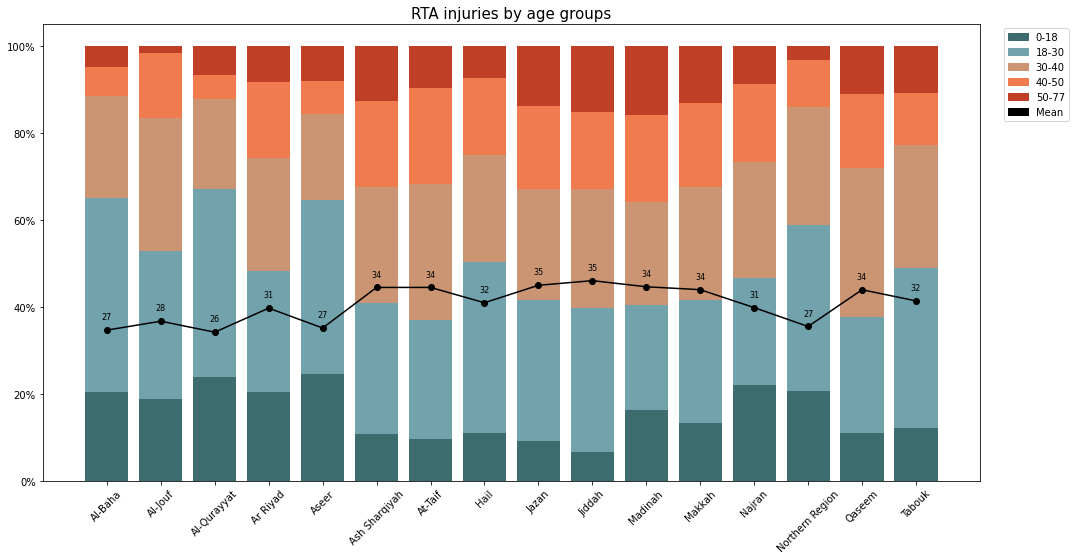

In [8]:
m = 'injuries'
#make the subset
subset = df_regions[[ 'region','sum_'+m, m+'_0_18',m+'_18_30',m+'_30_40',m+'_40_50',m+'_50','mean_'+m+'_age']].copy()
f = 1.4

#define the plot and set defaul colors
fig, ax = plt.subplots(figsize=(f*12,f*6))

colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax.set_prop_cycle(color = colors )

#plot the stacked bars
bottom = 0
for i in np.arange(2,7):
    ax.bar(zorder=1, x = subset.index+1,height=subset.iloc[:,i]/subset.iloc[:,1], bottom=bottom)
    bottom= bottom + subset.iloc[:,i]/subset.iloc[:,1]

#plot the mean age
ax.scatter(zorder=3, x = subset.index+1, y = subset.iloc[:,-1]/77, color = 'k')
ax.plot(subset.index+1,subset.iloc[:,-1]/77, color = 'k')

#Set the x and y ticks
ax.set_xticks(ticks = subset.index+1)
ax.set_xticklabels(labels = subset.iloc[:,0], Rotation= 45)
ax.set_yticklabels(list(x + "%" for x in list(str(i) for i in np.arange(0,120,20))))

#Set the title
ax.set_title(label = "RTA injuries by age groups", size = 15)
for i in subset.index:
    ax.annotate(text= int(np.round(subset.iloc[:,-1][i])), xy=list(zip([float(i) for i in subset.index+1], (subset.iloc[:,-1]/77)+0.02))[i],
               ha='center', va = 'bottom', size = 8)

#Set the legend
import matplotlib.patches as mpa
colors.append('k')
age_g = ['0-18', '18-30', '30-40', '40-50', '50-77', 'Mean']
legend_handels = []
for x in np.arange(len(colors)):
    legend_handels.append(mpa.Patch(color= colors[x], label=age_g[x]))

plt.legend(handles=legend_handels, ncol = 1, loc = 1, bbox_to_anchor=(.1, 0.9, 1.0, .102))

#Save the plot
plt.savefig('age_groups_'+m+'_newcolor.jpg', dpi = 300)
plt.show()

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


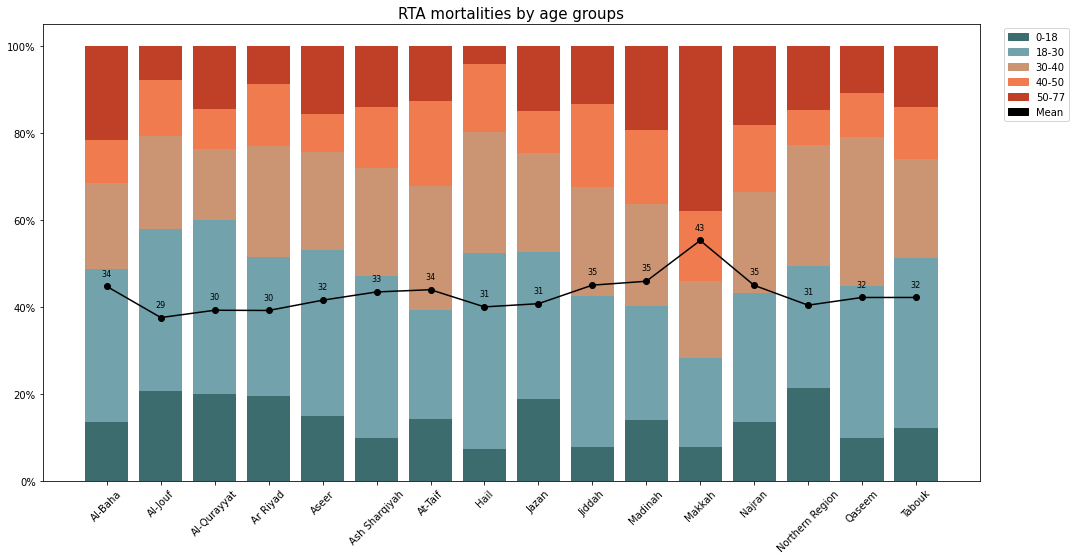

In [9]:
m = 'dead'
#make the subset
subset = df_regions[[ 'region','sum_'+m, m+'_0_18',m+'_18_30',m+'_30_40',m+'_40_50',m+'_50','mean_'+m+'_age']].copy()
f = 1.4

#define the plot and set defaul colors
fig, ax = plt.subplots(figsize=(f*12,f*6))
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax.set_prop_cycle(color = colors )


#plot the stacked bars
bottom = 0
for i in np.arange(2,7):
    ax.bar(zorder=1, x = subset.index+1,height=subset.iloc[:,i]/subset.iloc[:,1], bottom=bottom)
    bottom= bottom + subset.iloc[:,i]/subset.iloc[:,1]

#plot the mean age
ax.scatter(zorder=3, x = subset.index+1, y = subset.iloc[:,-1]/77, color = 'k')
ax.plot(subset.index+1,subset.iloc[:,-1]/77, color = 'k')

#Set the x and y ticks
ax.set_xticks(ticks = subset.index+1)
ax.set_xticklabels(labels = subset.iloc[:,0], Rotation= 45)
ax.set_yticklabels(list(x + "%" for x in list(str(i) for i in np.arange(0,120,20))))

#Set the title
ax.set_title(label = "RTA mortalities by age groups", size = 15)
for i in subset.index:
    ax.annotate(text= int(np.round(subset.iloc[:,-1][i])), xy=list(zip([float(i) for i in subset.index+1], (subset.iloc[:,-1]/77)+0.02))[i],
               ha='center', va = 'bottom', size = 8)

#Set the legend
import matplotlib.patches as mpa
colors.append('k')
age_g = ['0-18', '18-30', '30-40', '40-50', '50-77', 'Mean']
legend_handels = []
for x in np.arange(len(colors)):
    legend_handels.append(mpa.Patch(color= colors[x], label=age_g[x]))

plt.legend(handles=legend_handels, ncol = 1, loc = 1, bbox_to_anchor=(.1, 0.9, 1.0, .102))

#Save the plot
plt.savefig('age_groups_'+m+'_newcolor.jpg', dpi = 300)
plt.show()

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


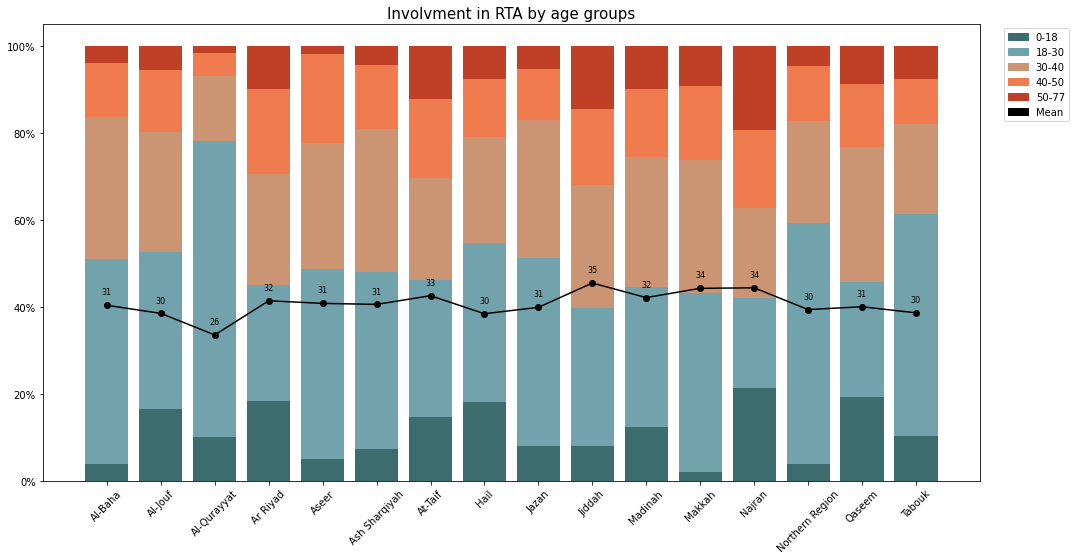

In [10]:
m = 'involved'
#make the subset
subset = df_regions[[ 'region','sum_'+m, m+'_0_18',m+'_18_30',m+'_30_40',m+'_40_50',m+'_50','mean_'+m+'_age']].copy()
f = 1.4

#define the plot and set defaul colors
fig, ax = plt.subplots(figsize=(f*12,f*6))
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax.set_prop_cycle(color = colors )

#plot the stacked bars
bottom = 0
for i in np.arange(2,7):
    ax.bar(zorder=1, x = subset.index+1,height=subset.iloc[:,i]/subset.iloc[:,1], bottom=bottom)
    bottom= bottom + subset.iloc[:,i]/subset.iloc[:,1]

#plot the mean age
ax.scatter(zorder=3, x = subset.index+1, y = subset.iloc[:,-1]/77, color = 'k')
ax.plot(subset.index+1,subset.iloc[:,-1]/77, color = 'k')

#Set the x and y ticks
ax.set_xticks(ticks = subset.index+1)
ax.set_xticklabels(labels = subset.iloc[:,0], Rotation= 45)
ax.set_yticklabels(list(x + "%" for x in list(str(i) for i in np.arange(0,120,20))))

#Set the title
ax.set_title(label = "Involvment in RTA by age groups", size = 15)
for i in subset.index:
    ax.annotate(text= int(np.round(subset.iloc[:,-1][i])), xy=list(zip([float(i) for i in subset.index+1], (subset.iloc[:,-1]/77)+0.02))[i],
               ha='center', va = 'bottom', size = 8)

#Set the legend
import matplotlib.patches as mpa
colors.append('k')
age_g = ['0-18', '18-30', '30-40', '40-50', '50-77', 'Mean']
legend_handels = []
for x in np.arange(len(colors)):
    legend_handels.append(mpa.Patch(color= colors[x], label=age_g[x]))

plt.legend(handles=legend_handels, ncol = 1, loc = 1, bbox_to_anchor=(.1, 0.9, 1.0, .102))

#Save the plot
plt.savefig('age_groups_'+m+'_newcolor.jpg', dpi = 300)
plt.show()